In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy  as sp
import numpy  as np
import mpmath as mp
import numpy  as np
import matplotlib.pyplot as plt

from scipy.stats import wasserstein_distance
from scipy.signal import find_peaks

# EQUAÇÃO DO PÊNDULO
$$\ddot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

In [2]:
theta = sp.Function('theta')
t     = sp.symbols('t')
g, L  = sp.symbols('g L', real=True, positive=True) 

EDO = sp.Eq(theta(t).diff(t, 2) + (g/L)*sp.sin(theta(t)), 0)
EDO

Eq(Derivative(theta(t), (t, 2)) + g*sin(theta(t))/L, 0)

In [3]:
#sol = sp.dsolve(EDO)
#sol

# NUMERIC SOLVE

In [4]:
g = 9.980665
L = 1.0

In [5]:
theta0 = 45 * (np.pi / 3.14) 
omega0 = 0.0 

### Sem Atrito
$$\ddot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

In [6]:
def edo(t, y):
    theta, omega = y
    return [omega, -(g/L)*mp.sin(theta)]

theta0 = 45 * (np.pi / 3.14) 
omega0 = 0.0 

f1 = mp.odefun(edo, 0.0, [theta0, omega0])
f1

<function mpmath.calculus.odes.odefun.<locals>.interpolant(x)>

### Com Atrito
$$\ddot{\theta} + \alpha\cdot\dot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

Como achar $\alpha$ experimentalmente?

- $\alpha = \frac{1}{Q} \cdot \sqrt{\frac{g}{L}}$ 
- $Q$ é o numero de vezes que o pendulo oscila (vai e volta até a posição inicial) até parar (chegar a $\approx$ 4% da sua amplitude inicial)

In [7]:
Q = 14 # quantas vezes ele oscila até parar
alpha = 1/Q * mp.sqrt(g/L)

In [8]:
def edo(t, y):
    theta, omega = y
    return [omega, - (alpha)*omega - (g/L)*mp.sin(theta)]

f2 = mp.odefun(edo, 0.0, [theta0, omega0])
f2

<function mpmath.calculus.odes.odefun.<locals>.interpolant(x)>

### Visualização

In [9]:
f = f2
dt = 0.001

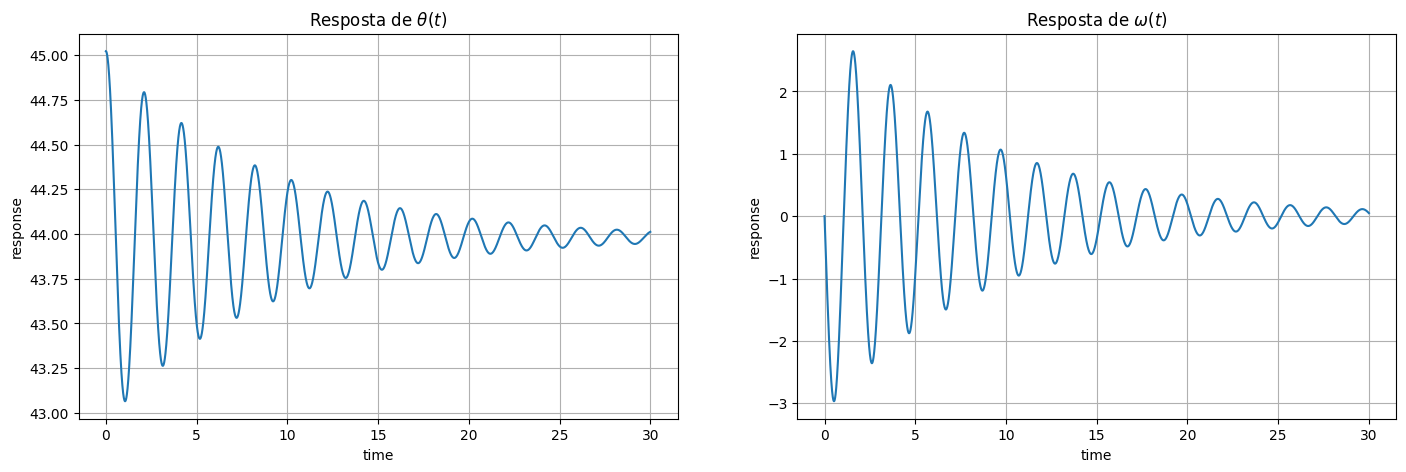

In [10]:
time     = np.arange(0, 30, dt)
response = [f(t) for t in time]
theta = np.array([float(theta) for (theta, omega) in response])
omega = np.array([float(omega) for (theta, omega) in response])

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\theta(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, omega)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\omega(t)$')
plt.show()

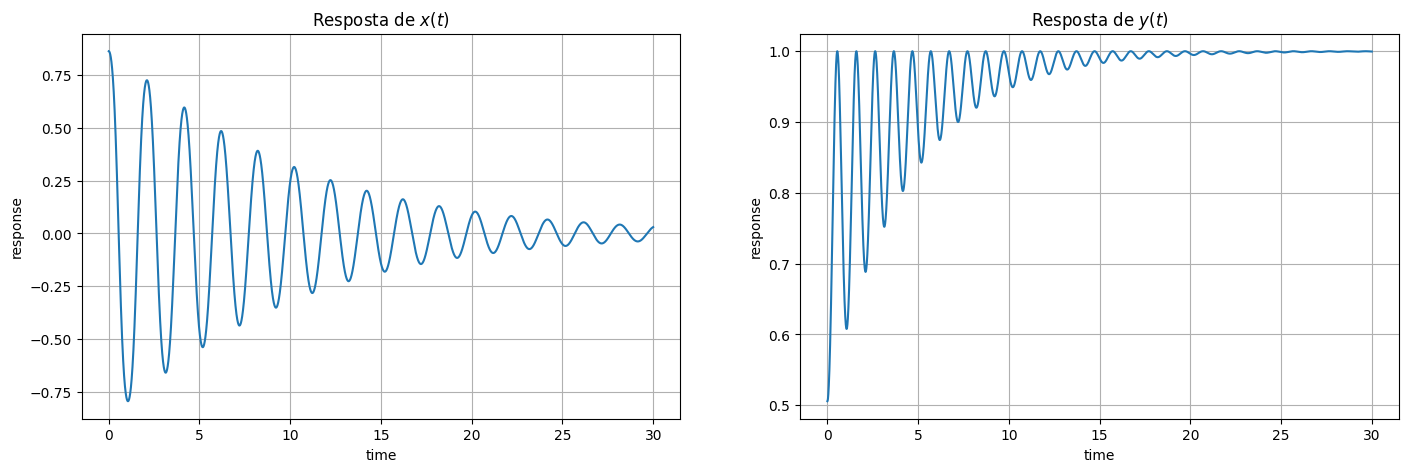

In [11]:
x = L * np.sin(theta)
y = L * np.cos(theta)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, x)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $x(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, y)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $y(t)$')
plt.show()

In [12]:
df = pd.DataFrame({
    'time': time,
    'theta': theta,
    'omega': omega,
    'x': x,
    'y': y
})

df

,time,theta,omega,x,y
0,0.000,45.022825,0.000000,0.862671,0.505765
1,0.001,45.022820,-0.008609,0.862669,0.505769
2,0.002,45.022807,-0.017216,0.862662,0.505780
3,0.003,45.022786,-0.025821,0.862652,0.505799
4,0.004,45.022756,-0.034424,0.862636,0.505825
...,...,...,...,...,...
29995,29.995,44.012260,0.049357,0.029959,0.999551
29996,29.996,44.012310,0.049047,0.030008,0.999550
29997,29.997,44.012358,0.048736,0.030057,0.999548
29998,29.998,44.012407,0.048425,0.030105,0.999547


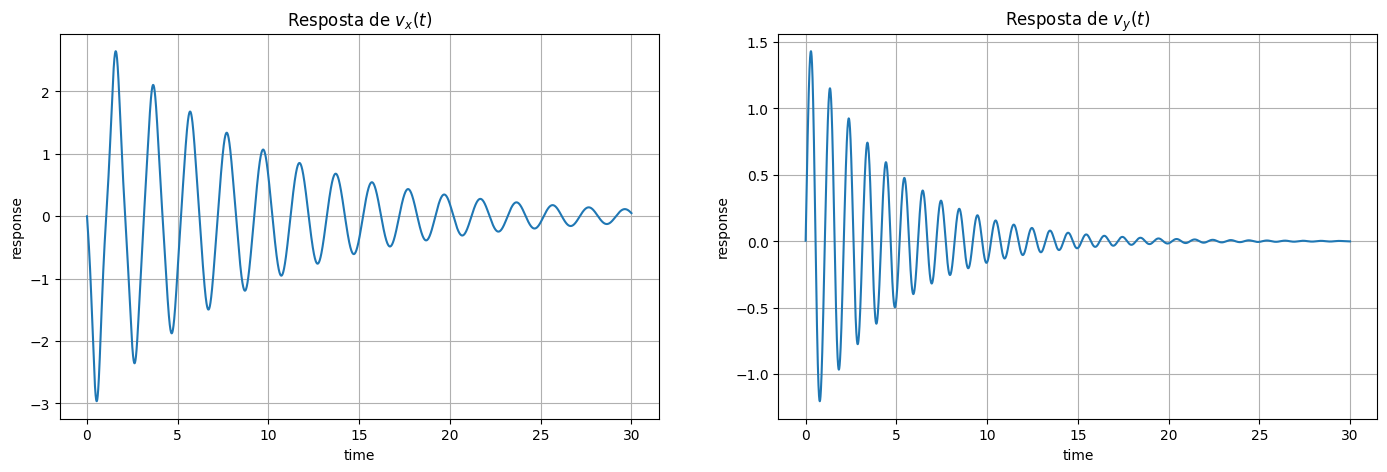

In [13]:
df['vx'] = np.gradient(df.x, dt)
df['vy'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_y(t)$')
plt.show()

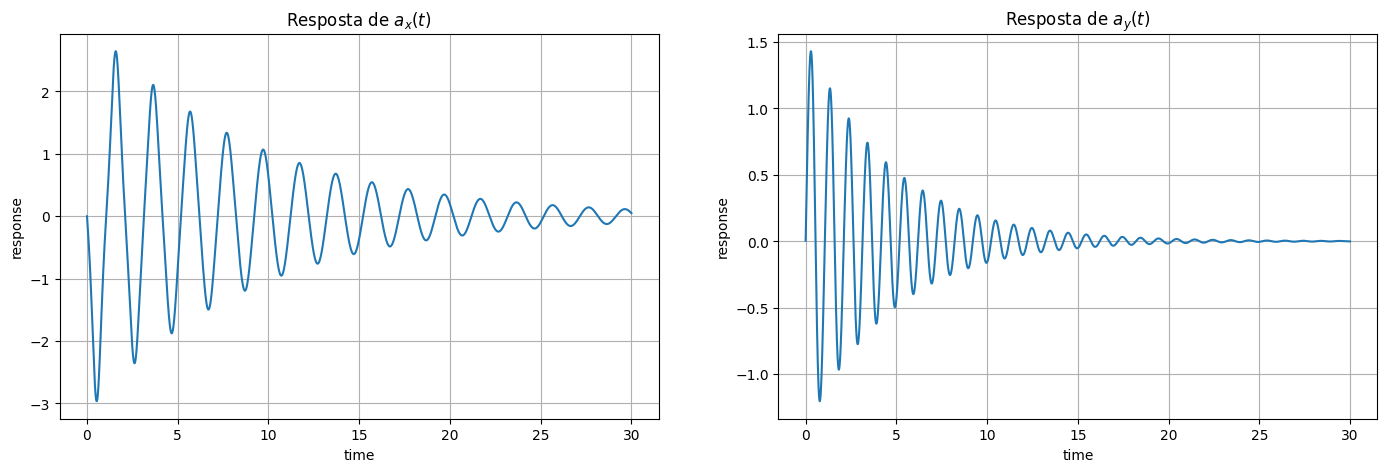

In [14]:
df['ax'] = np.gradient(df.x, dt)
df['ay'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_y(t)$')
plt.show()

In [15]:
pendulum = df.copy()
pendulum.to_csv('files/Modeling.csv', index=None)
pendulum

,time,theta,omega,x,y,vx,vy,ax,ay
0,0.000,45.022825,0.000000,0.862671,0.505765,-0.002177,0.003714,-0.002177,0.003714
1,0.001,45.022820,-0.008609,0.862669,0.505769,-0.004354,0.007426,-0.004354,0.007426
2,0.002,45.022807,-0.017216,0.862662,0.505780,-0.008707,0.014851,-0.008707,0.014851
3,0.003,45.022786,-0.025821,0.862652,0.505799,-0.013060,0.022274,-0.013060,0.022274
4,0.004,45.022756,-0.034424,0.862636,0.505825,-0.017413,0.029695,-0.017413,0.029695
...,...,...,...,...,...,...,...,...,...
29995,29.995,44.012260,0.049357,0.029959,0.999551,0.049335,-0.001479,0.049335,-0.001479
29996,29.996,44.012310,0.049047,0.030008,0.999550,0.049025,-0.001472,0.049025,-0.001472
29997,29.997,44.012358,0.048736,0.030057,0.999548,0.048714,-0.001465,0.048714,-0.001465
29998,29.998,44.012407,0.048425,0.030105,0.999547,0.048403,-0.001458,0.048403,-0.001458


# DADOS REAIS

In [16]:
df = pd.read_csv('files/DataBase.csv')
df

,wy,ay,yaw,wx,time,az,wz,pitch,ax,roll
0,0.0,0.0,0.0,0.0,0.261000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.271000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.281000,0.0,0.0,0.0,0.0,0.0
3,-1.0,135.0,0.0,0.0,0.741000,-6.0,0.0,0.0,-479.0,0.0
4,-1.0,135.0,0.0,0.0,0.741000,-6.0,0.0,0.0,-479.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10359,10.0,78.0,33886.0,-2.0,114.060997,-294.0,4.0,902.0,-394.0,12696.0
10360,9.0,78.0,33886.0,0.0,114.070999,-294.0,3.0,902.0,-394.0,12696.0
10361,9.0,78.0,33886.0,-1.0,114.081001,-294.0,4.0,902.0,-394.0,12697.0
10362,13.0,78.0,33888.0,1.0,114.161003,-295.0,5.0,905.0,-394.0,12706.0


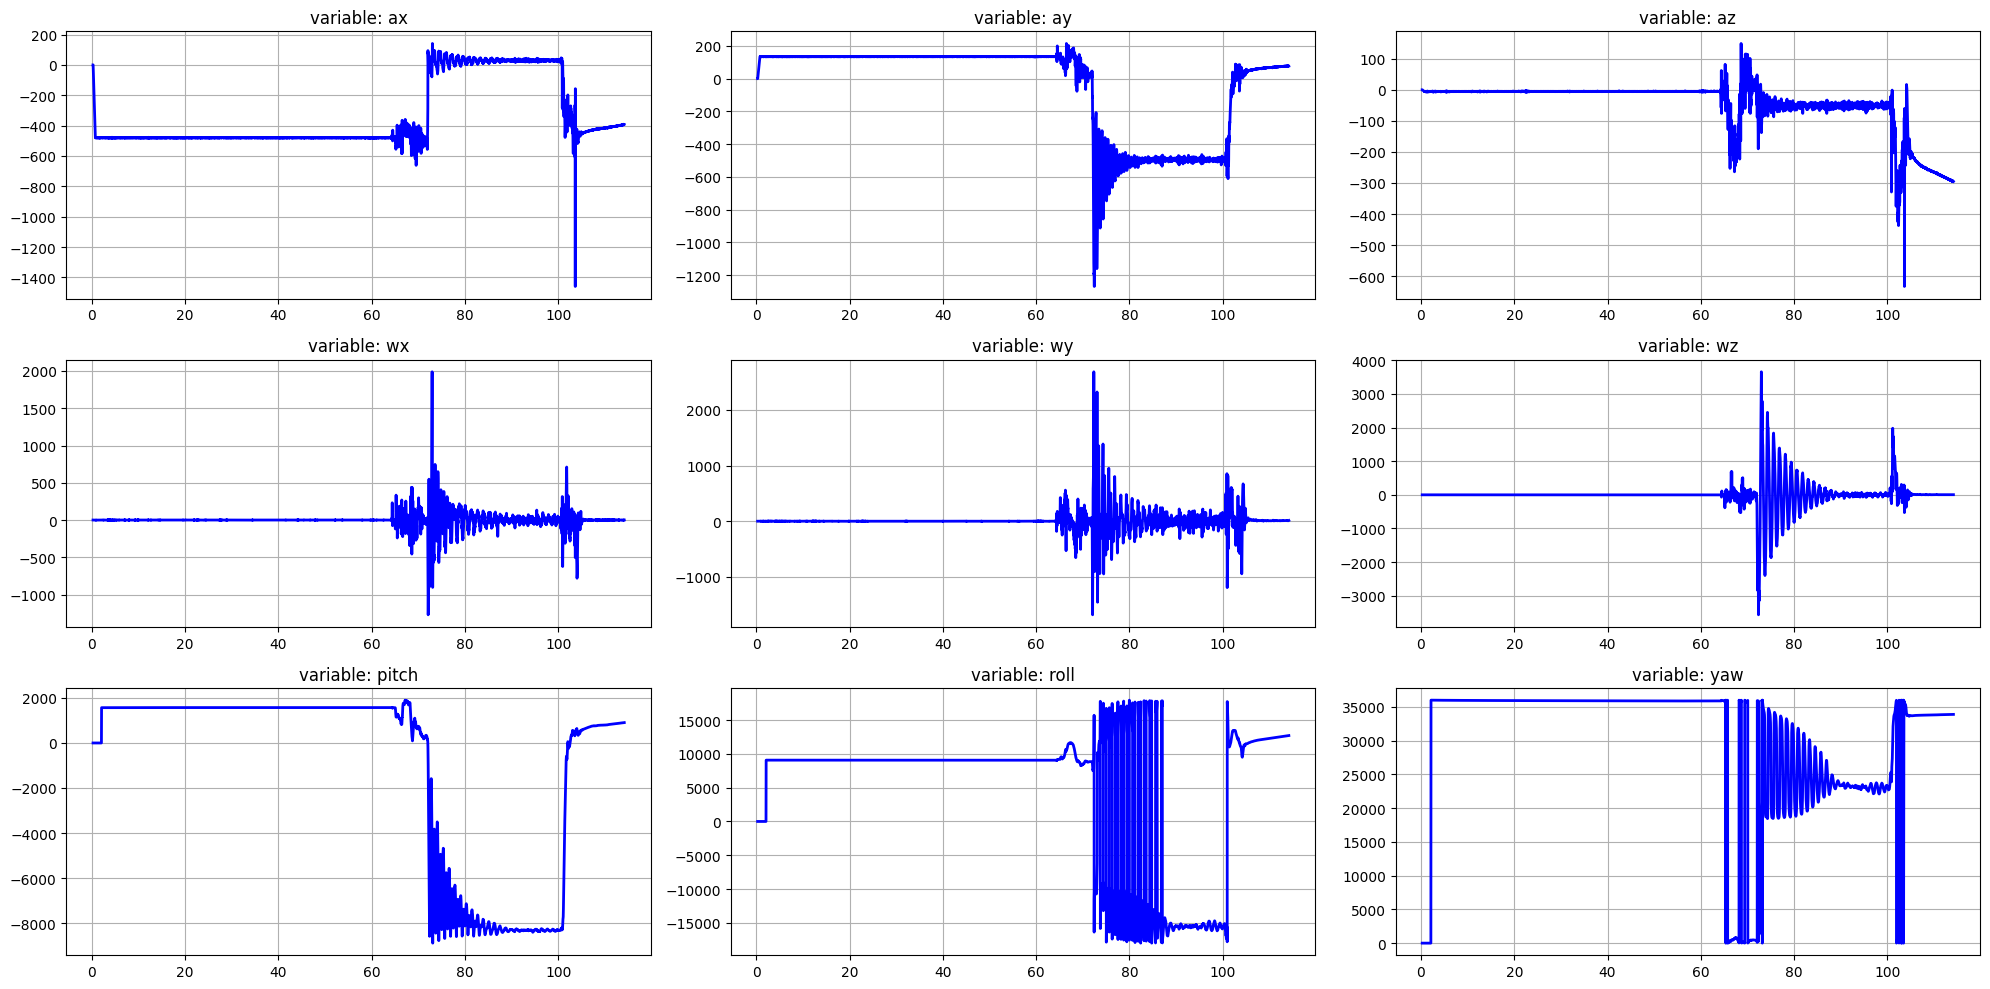

In [17]:
def plotAll(df, limits=None):
    limits = list(limits) if limits is not None else [None, None]

    if limits[0] is None:
        limits[0] = 0

    if limits[1] is None:
        limits[1] = df.time.values[-1]

    target = df.loc[(df.time >= limits[0]) & (df.time <= limits[1])]

    plt.figure(figsize=(20, 10))
    for i, key in enumerate(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'pitch', 'roll', 'yaw']):
        plt.subplot(3, 3, i+1)
        plt.plot(target.time, target[key], color='blue', linewidth=2)
        plt.title(f'variable: {key}'), plt.grid()

    plt.tight_layout()
    plt.show()


plotAll(df, limits=None)

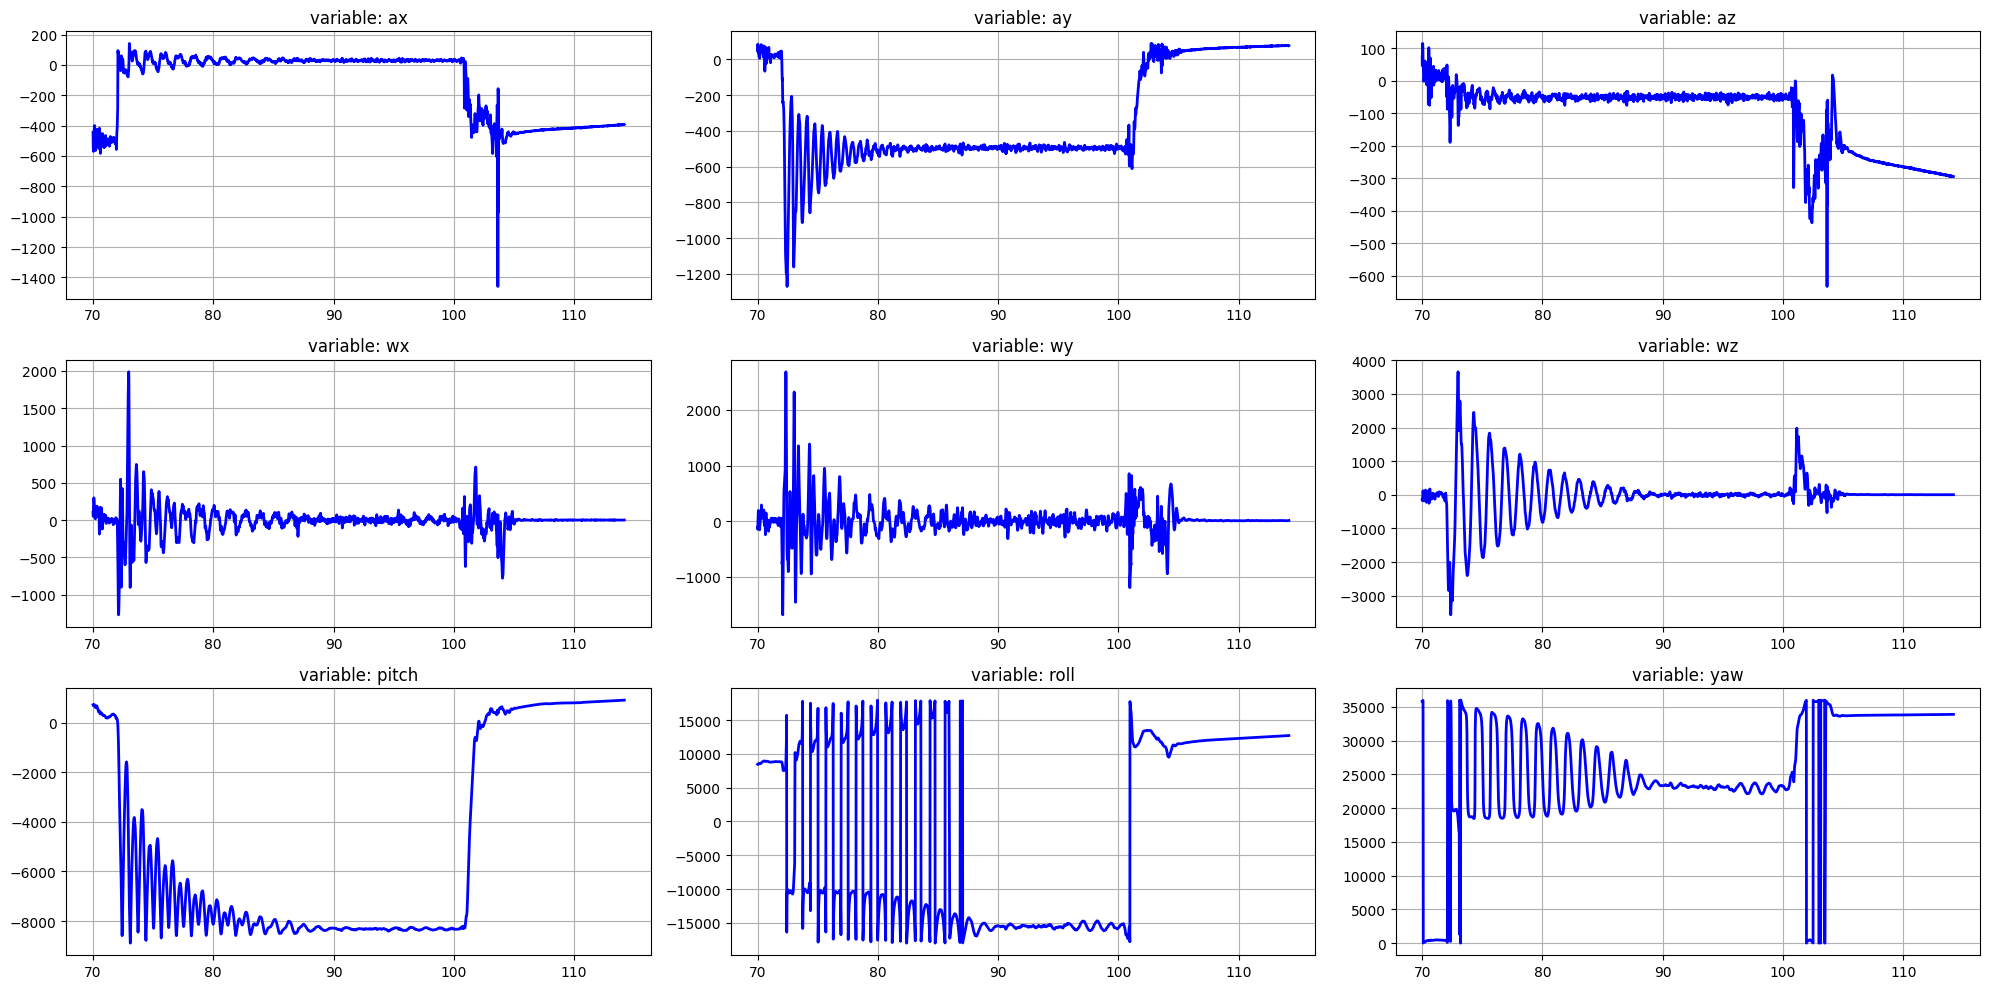

In [18]:
plotAll(df, limits=(70, None))

In [19]:
sensor = df.loc[(df.time > 70) & (df.time < 90)].copy()
target = 'wz'

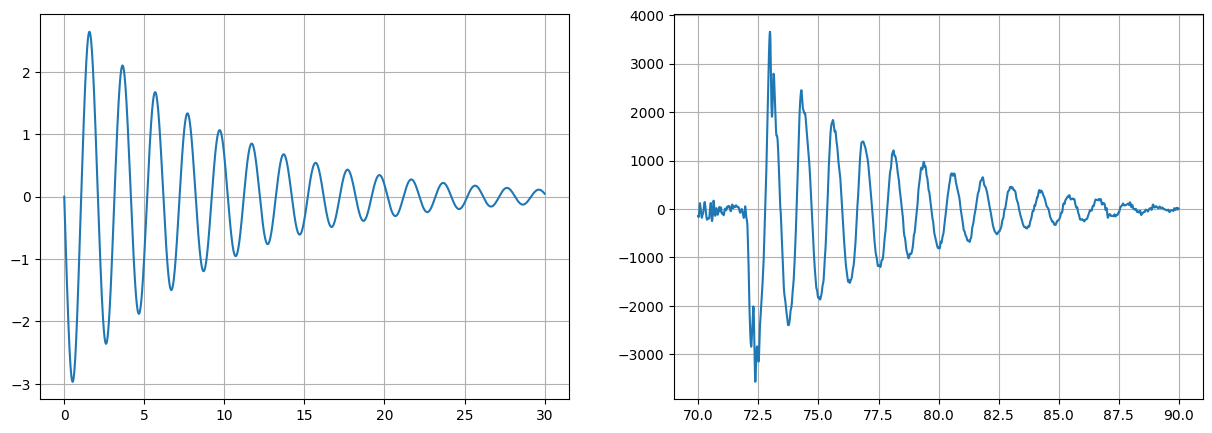

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(pendulum.time, pendulum.omega)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(sensor.time, sensor[target])
plt.grid()

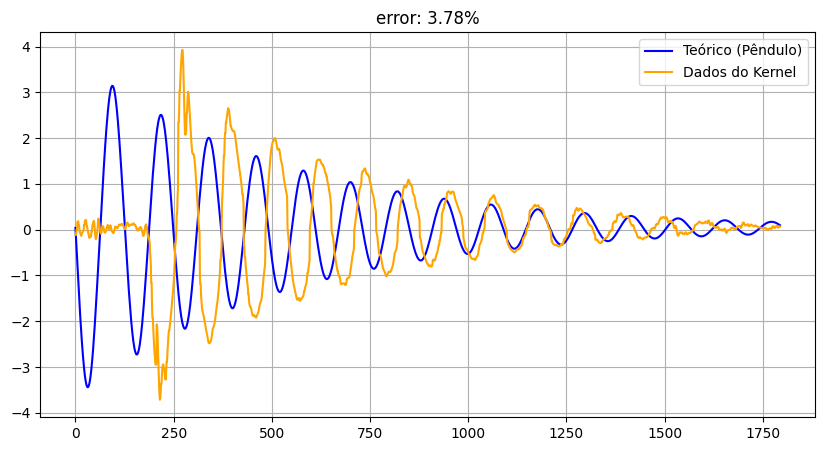

In [21]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2, phase=0, plot=False):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    data2 = data2[phase:]

    n_samples = min(len(data1), len(data2))
    samples1 = np.linspace(0, len(data1)-1, n_samples, dtype=int)
    samples2 = np.linspace(0, len(data2)-1, n_samples, dtype=int)

    data1 = data1[samples1]
    data2 = data2[samples2]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(data1, color='blue', label='Teórico (Pêndulo)')
        plt.plot(data2, color='orange',  label='Dados do Kernel')
        plt.title(f'error: {score*100:.2f}%')
        plt.legend(), plt.grid()
        plt.show()

    return (data1, data2, score)


result = compare(pendulum.omega, sensor[target], plot=True)

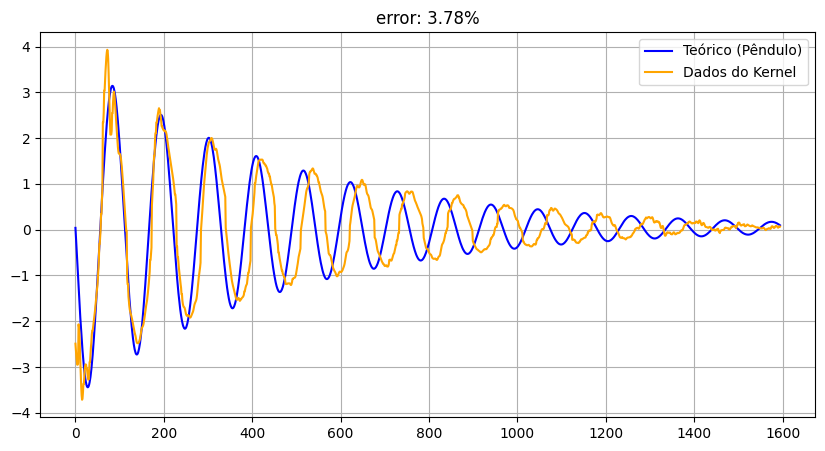

In [22]:
result = compare(pendulum.omega, sensor[target], plot=True, phase=200)